# **Problem Statement**

*   The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

*   Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.


# **Objective**

The objective of this analysis is to:

1. **Perform Descriptive Analytics:** Analyze the dataset to create detailed customer profiles for each AeroFit treadmill product (KP281, KP481, and KP781) by examining customer characteristics such as age, gender, education, marital status, usage, fitness level, income, and miles run/walked per week.

2. **Identify Customer Segments:** Determine distinct customer segments for each treadmill product to understand the key demographic and behavioral factors that influence their purchasing decisions.

3. **Construct Two-Way Contingency Tables:** Develop two-way contingency tables for various combinations of customer characteristics and treadmill products to compute conditional and marginal probabilities.

4. **Visualize Data:** Create appropriate tables and charts to visualize the distribution of customer characteristics and their relationship with treadmill products.

5. **Derive Business Insights:** Generate actionable business insights and recommendations based on the analysis to help AeroFit's market research team provide better product recommendations to new customers.

6. **Compute Probabilities:** Calculate all relevant conditional and marginal probabilities to understand the likelihood of certain customer characteristics leading to the purchase of specific treadmill models.




# **Step 1: Basic Metrics Analysis**

In this step, we will:

1. **Load the Dataset:** Import the dataset from the provided CSV file.
2. **Check the Structure and Characteristics of the Dataset:**
   - Display the first few rows of the dataset to understand its structure.
   - Check the shape of the dataset to know the number of rows and columns.
   - Examine the data types of all the attributes.
   - Generate summary statistics for the dataset.
3. **Convert Categorical Attributes (if needed):**
   - Convert categorical attributes such as 'Gender', 'MaritalStatus', and 'Product' to the 'category' data type for efficient analysis.
4. **Non-Graphical Analysis:**
   - Perform value counts for categorical attributes to understand their distribution.
   - Identify unique values for each column to get an overview of the dataset.

Let's start by implementing these steps in code.


In [ ]:
import pandas as pd

#Load the data
data = pd.read_csv("aerofit_treadmill.txt")

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47


In [ ]:
# Check the shape of the dataset
print("Shape of the dataset:")
print(data.shape)

Shape of the dataset:
(180, 9)


In [ ]:
# Check the data types of all attributes
print("Data types of the attributes:")
print(data.dtypes)

Data types of the attributes:
Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


In [ ]:
# Generate summary statistics for the dataset
print("Statistical summary of the dataset:\n")
print(data.describe())

Statistical summary of the dataset:

              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000  


In [ ]:
# Convert 'Gender', 'MaritalStatus', and 'Product' to category type
data['Gender'] = data['Gender'].astype('category')
data['MaritalStatus'] = data['MaritalStatus'].astype('category')
data['Product'] = data['Product'].astype('category')


In [ ]:
# Verify the conversion
print("Data types after conversion:\n")
print(data.dtypes)

Data types after conversion:

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object


# **Step 2: Non-Graphical Analysis**



*   Perform value counts for categorical attributes to understand their distribution.

   
* Identify unique values for each column to get an overview of the dataset.



In [ ]:
# Perform value counts for categorical attributes
print("Value counts for 'Product':\n")
print(data['Product'].value_counts())

Value counts for 'Product':

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64


In [ ]:
print("Value counts for 'Gender':\n")
print(data['Gender'].value_counts())

Value counts for 'Gender':

Gender
Male      104
Female     76
Name: count, dtype: int64


In [ ]:
print("Value counts for 'MaritalStatus':\n")
print(data['MaritalStatus'].value_counts())

Value counts for 'MaritalStatus':

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


In [ ]:
# Identify unique values for each column
print("Unique values in each column:\n")
print(data.nunique())

Unique values in each column:

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64


# **Step 3: Visual Analysis - Univariate & Bivariate**

In this step, we will:

1. **Univariate Analysis for Continuous Variables:**
   - **Histogram:** Plot histograms for continuous variables to understand their distribution.
   - **Distplot:** Create distribution plots for continuous variables to visualize their density and distribution.

2. **Univariate Analysis for Categorical Variables:**
   - **Countplot:** Use countplots to show the count of observations in each categorical variable.
   - **Boxplot:** Generate boxplots to explore the distribution and identify any outliers in continuous variables against categorical variables.

3. **Bivariate Analysis:**
   - **Correlation Heatmap:** Create a heatmap to visualize the correlation between continuous variables.
   - **Pairplot:** Generate pairplots to see the pairwise relationships between continuous variables.

Let's implement these visualizations in code.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis for Continuous Variables

# Histogram for continuous variables
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Histogram of Age')

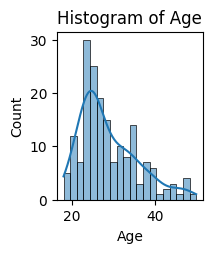

In [ ]:
# Histogram for Age
plt.subplot(2, 3, 1)
sns.histplot(data['Age'], kde=True, bins=20)
plt.title('Histogram of Age')

Text(0.5, 1.0, 'Histogram of Income')

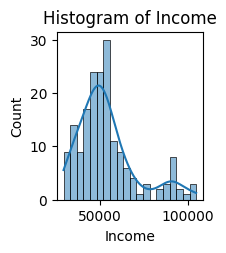

In [ ]:
# Histogram for Income
plt.subplot(2, 3, 2)
sns.histplot(data['Income'], kde=True, bins=20)
plt.title('Histogram of Income')

Text(0.5, 1.0, 'Histogram of Miles')

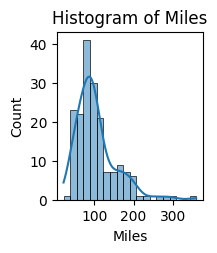

In [ ]:
# Histogram for Miles
plt.subplot(2, 3, 3)
sns.histplot(data['Miles'], kde=True, bins=20)
plt.title('Histogram of Miles')

Text(0.5, 1.0, 'Distribution of Age')

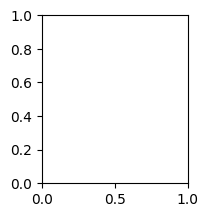

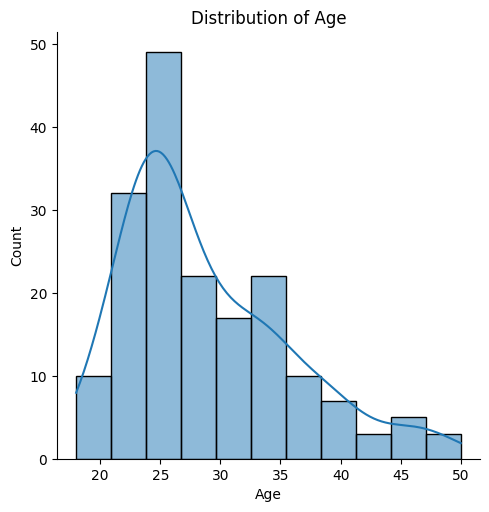

In [ ]:
# Distribution plot for continuous variables
plt.subplot(2, 3, 4)
sns.displot(data['Age'], kde=True)
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Income')

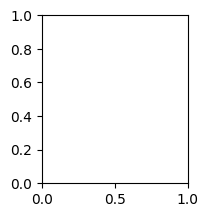

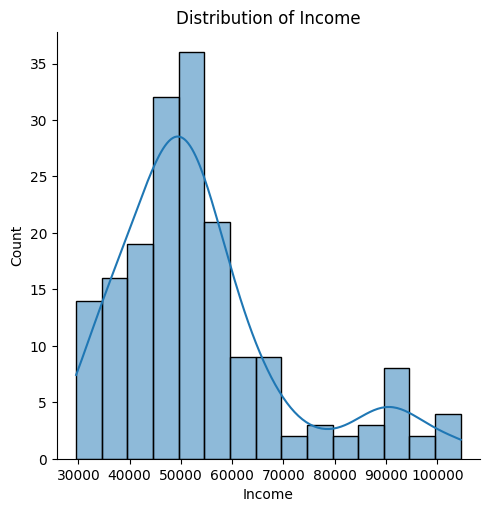

In [ ]:
plt.subplot(2, 3, 5)
sns.displot(data['Income'], kde=True)
plt.title('Distribution of Income')

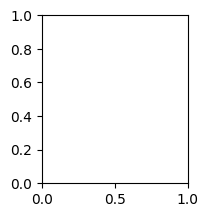

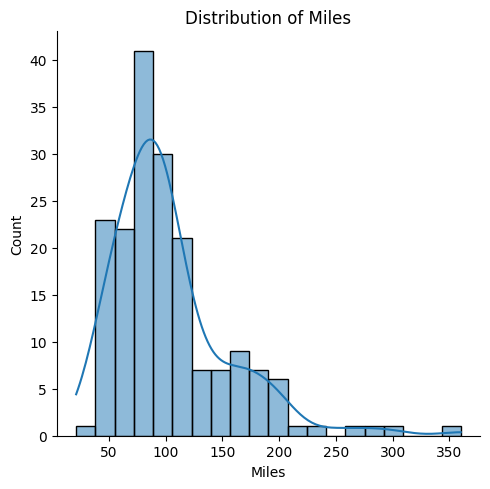

In [ ]:
plt.subplot(2, 3, 6)
sns.displot(data['Miles'], kde=True)
plt.title('Distribution of Miles')
plt.tight_layout()
plt.show()

In [ ]:
# Univariate Analysis for Categorical Variables

# Countplot for categorical variables
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

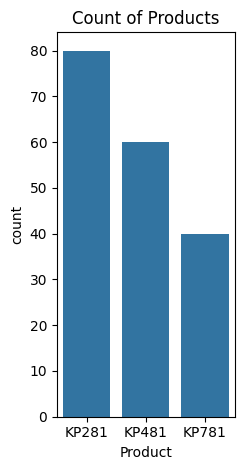

In [ ]:
# Countplot for Product
plt.subplot(1, 3, 1)
sns.countplot(x='Product', data=data)
plt.title('Count of Products')
plt.tight_layout()
plt.show()

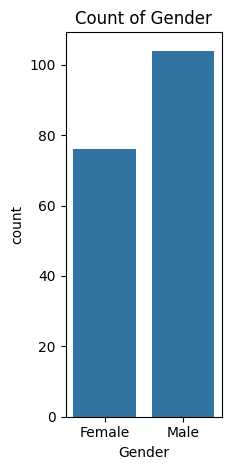

In [ ]:
# Countplot for Gender
plt.subplot(1, 3, 2)
sns.countplot(x='Gender', data=data)
plt.title('Count of Gender')
plt.tight_layout()
plt.show()

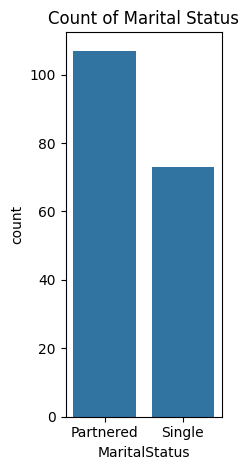

In [ ]:
# Countplot for MaritalStatus
plt.subplot(1, 3, 3)
sns.countplot(x='MaritalStatus', data=data)
plt.title('Count of Marital Status')
plt.tight_layout()
plt.show()

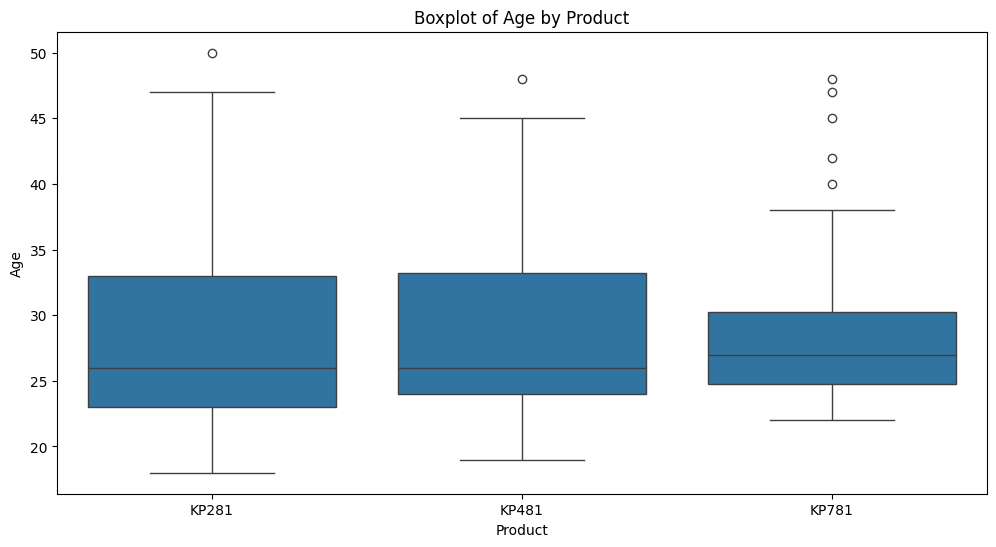

In [ ]:
# Boxplots for continuous variables against categorical variables

# Boxplot for Age by Product
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='Age', data=data)
plt.title('Boxplot of Age by Product')
plt.show()

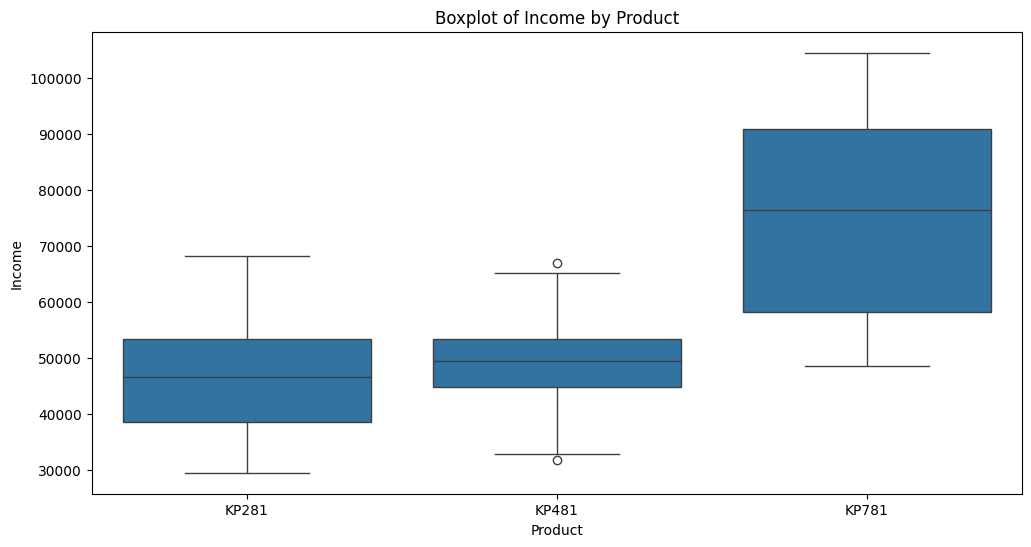

In [ ]:
# Boxplot for Income by Product
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='Income', data=data)
plt.title('Boxplot of Income by Product')
plt.show()


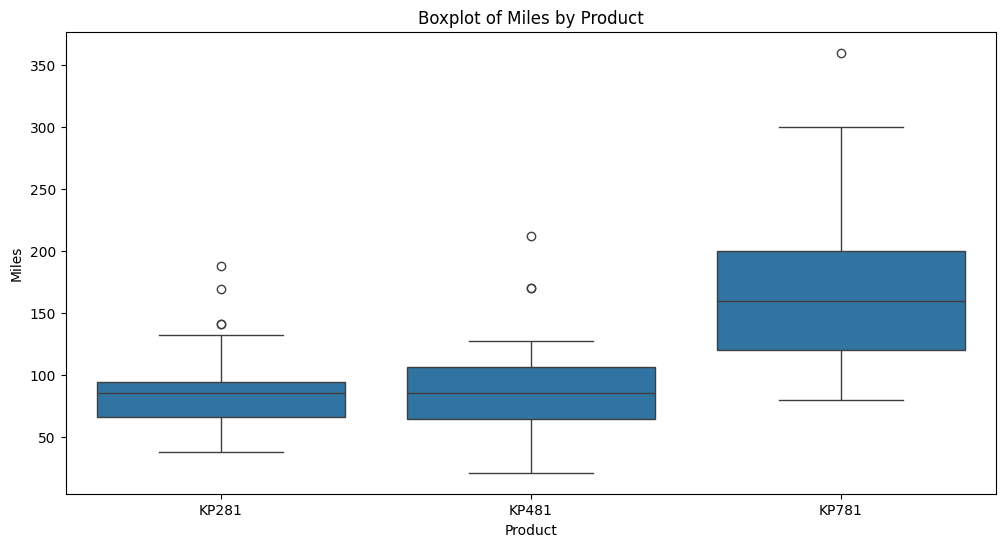

In [ ]:
# Boxplot for Miles by Product
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='Miles', data=data)
plt.title('Boxplot of Miles by Product')
plt.show()

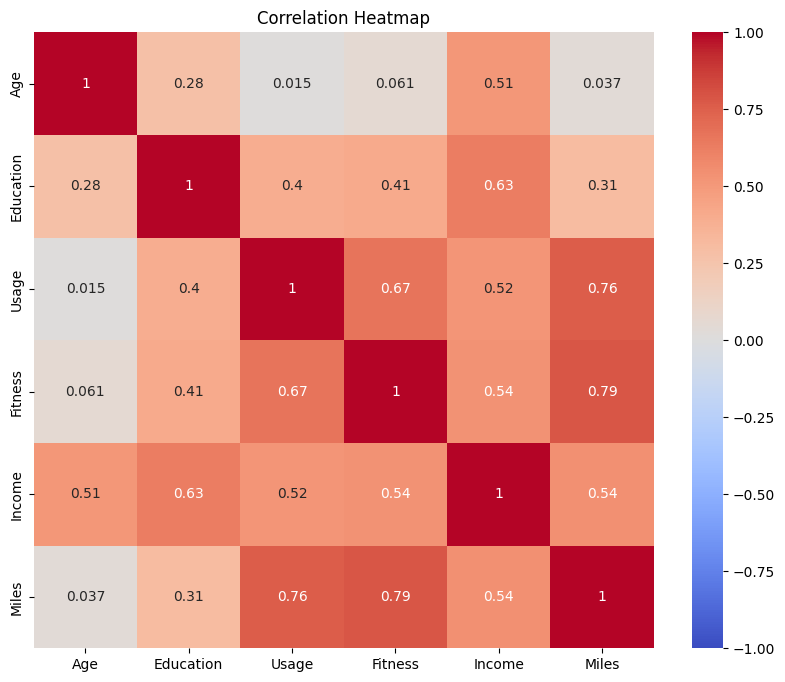

In [ ]:
# Bivariate Analysis

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

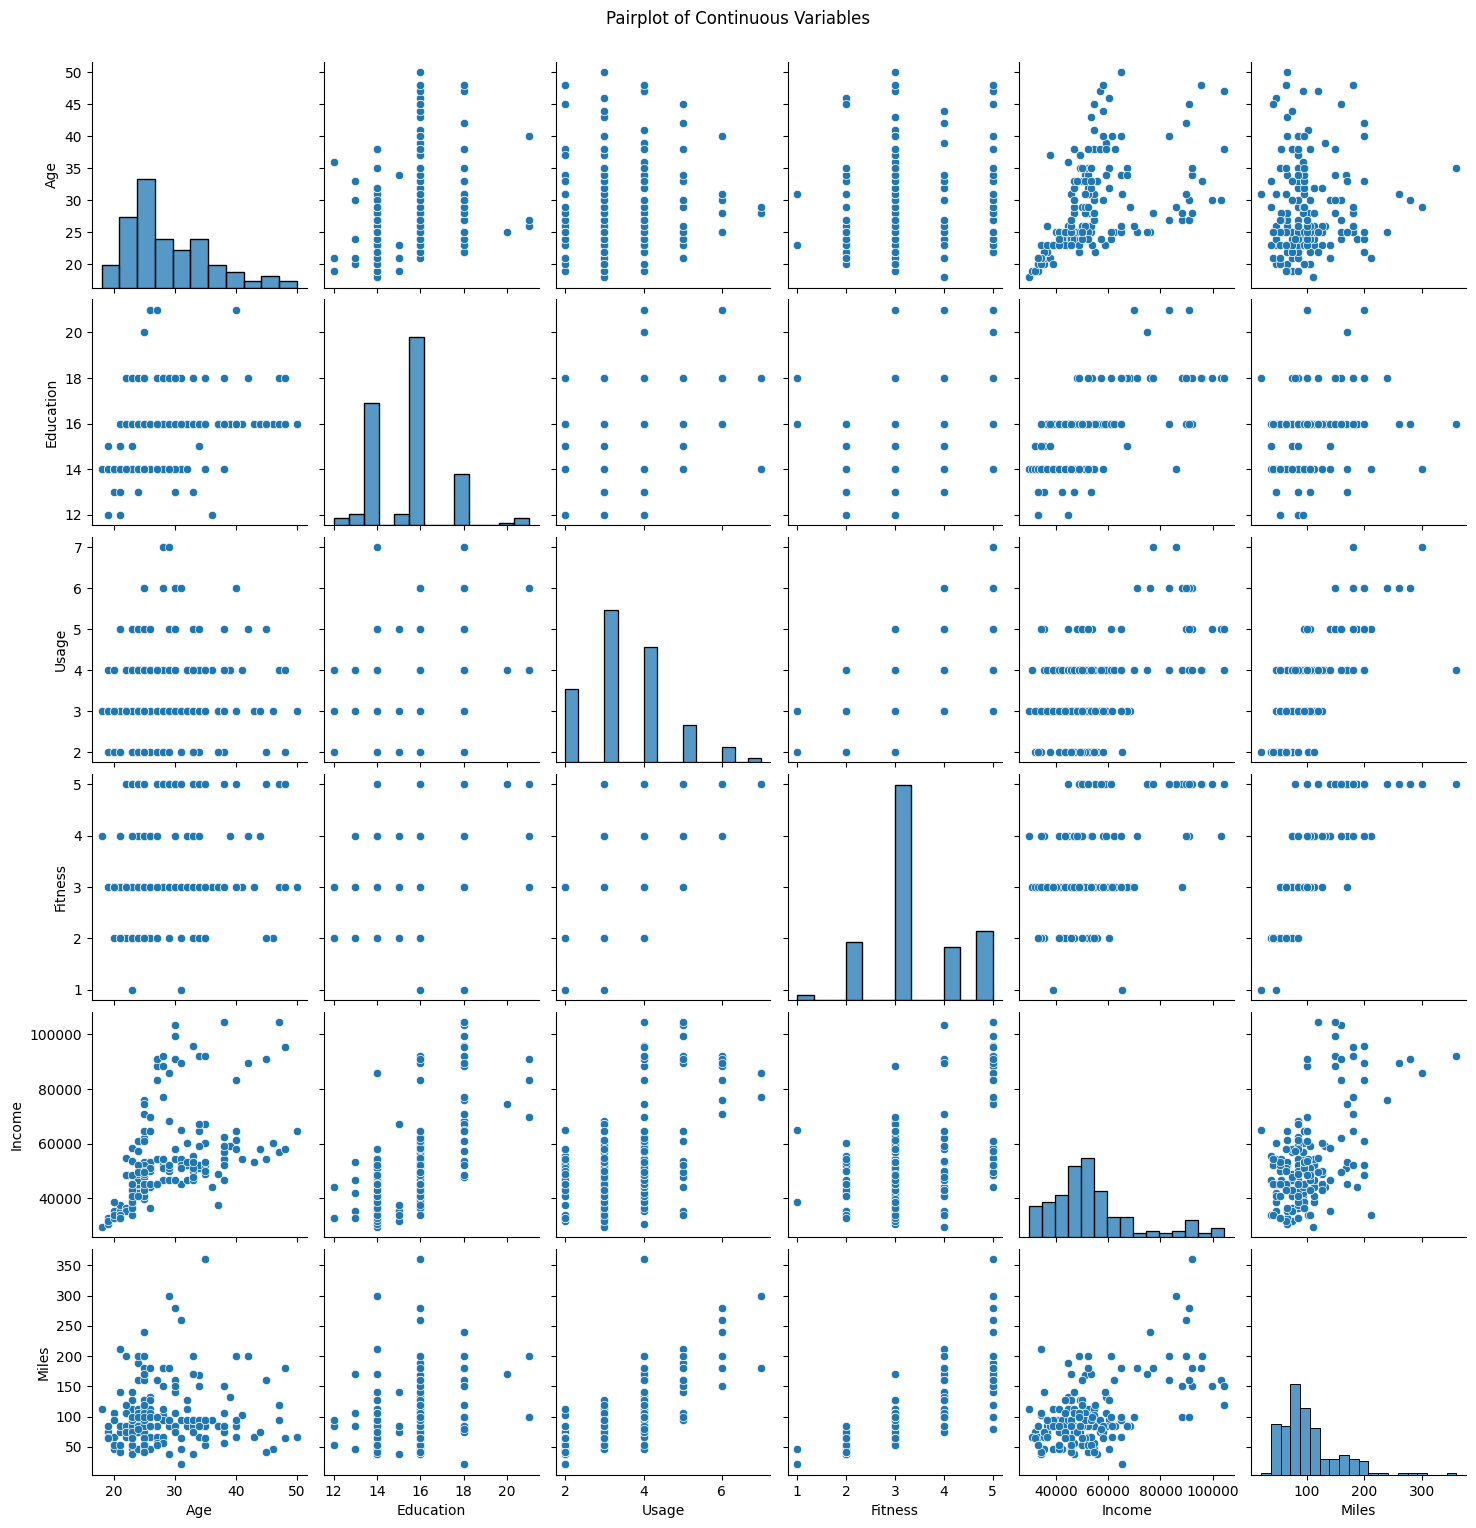

In [ ]:
# Pairplot for continuous variables
sns.pairplot(data[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']])
plt.suptitle('Pairplot of Continuous Variables', y=1.02)
plt.show()

# **Step 4: Missing Value & Outlier Detection**

In this step, we will:

1. **Identify Missing Values:**
   - Check for missing values in the dataset.
   - Display the count of missing values for each column.

2. **Detect Outliers:**
   - Use statistical methods such as Z-scores or IQR to identify outliers.
   - Visualize outliers using boxplots or scatter plots to understand their distribution and impact.

Let's proceed with the code for these tasks.


In [ ]:
import numpy as np

# 1. Identify Missing Values

# Check for missing values in the dataset
print("Missing values in each column:\n")
print(data.isnull().sum())

Missing values in each column:

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


Outliers detected in each numerical column:

Age: 5 outliers
Education: 4 outliers
Usage: 9 outliers
Fitness: 2 outliers
Income: 19 outliers
Miles: 13 outliers


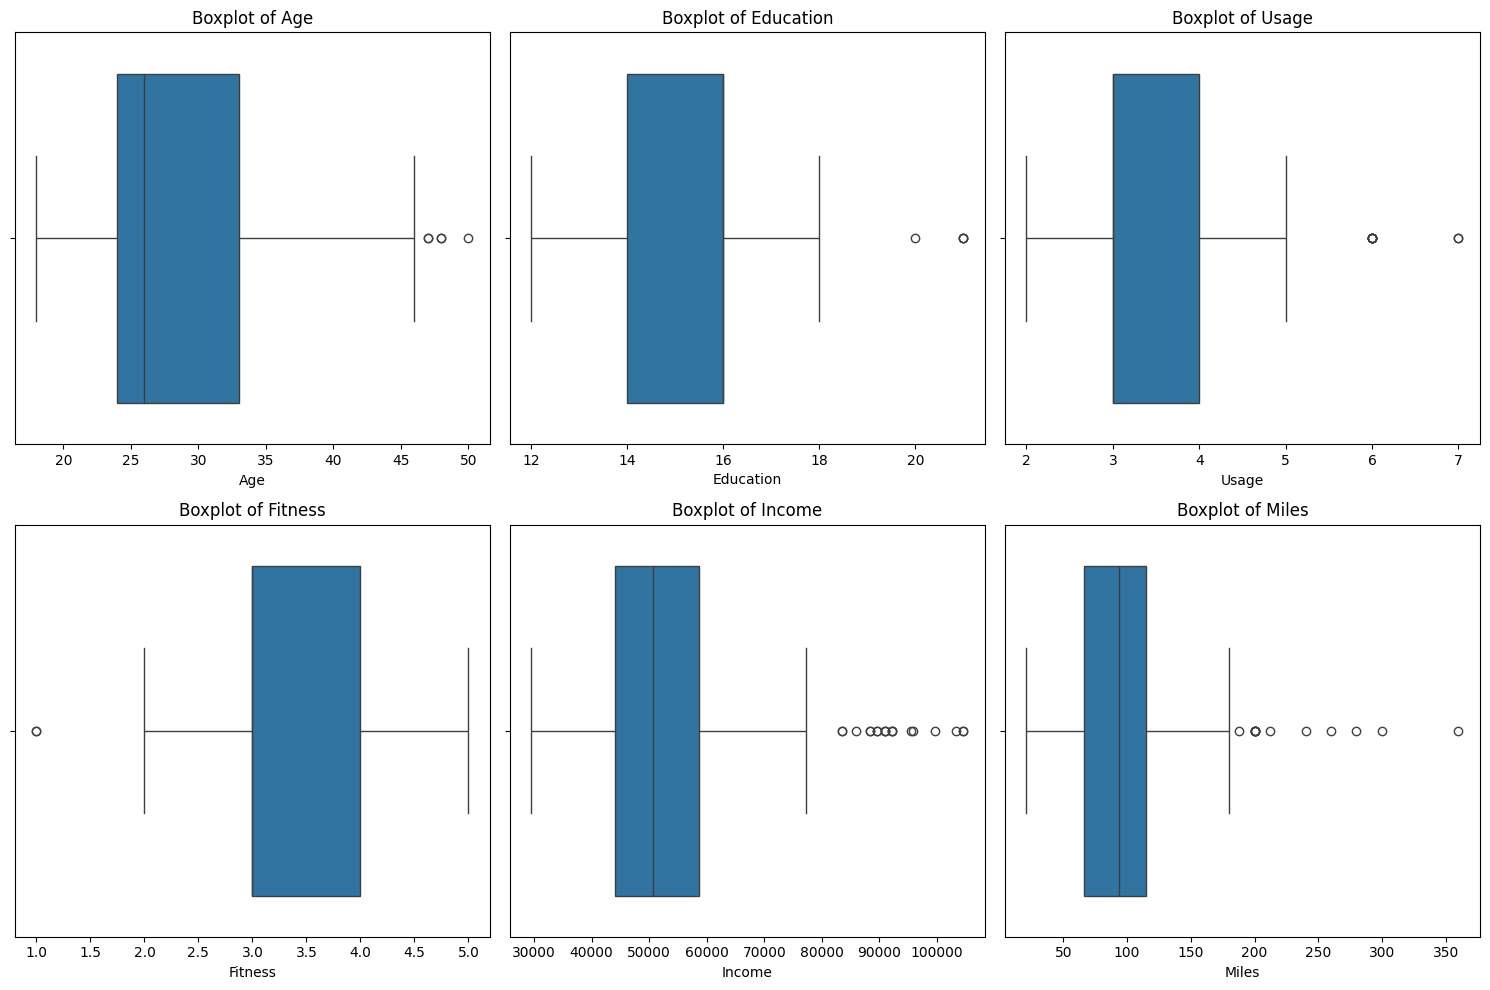

In [ ]:
# 2. Detect Outliers

# Define a function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outliers = {}
    for column in columns:
        if df[column].dtype in [np.int64, np.float64]:  # Only apply to numerical columns
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outlier_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
            outliers[column] = outlier_count
    return outliers

# Columns to check for outliers
numeric_columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
outliers = detect_outliers_iqr(data, numeric_columns)

print("Outliers detected in each numerical column:\n")
for column, count in outliers.items():
    print(f"{column}: {count} outliers")

# Visualize outliers using boxplots
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

# **Step 5: Business Insights Based on Non-Graphical and Visual Analysis**

## **Comments on the Range of Attributes**

1. **Age:** The age of customers ranges from 18 to 50 years. The mean age is approximately 29 years, with most customers falling between 24 and 33 years (25th to 75th percentiles). This range indicates a broad but youthful customer base, with a noticeable number of older customers as well.
2. **Education:** Education levels range from 12 to 21 years. The average education level is around 15 years, with most customers having between 14 and 16 years of education. Higher education levels are associated with the purchase of more advanced treadmill models.
3. **Usage:** The usage frequency ranges from 2 to 7 times per week. The average usage is about 3.5 times per week. This consistency suggests that customers are relatively regular users of the treadmill.
4. **Fitness:** Fitness levels range from 1 to 5, with a mean of approximately 3.3. Most customers have fitness levels between 3 and 4, indicating a moderately active customer base.
5. **Income:** The income range is from $29,562 to $104,581, with an average of $53,719. Higher-income customers tend to purchase more expensive models.
6. **Miles:** Miles run or walked per week range from 21 to 360, with an average of 103 miles. The distribution indicates a significant variation in activity levels among customers.

## **Comments on the Distribution of Variables**

1. **Product Distribution:** KP281 is the most popular product, followed by KP481 and KP781. This suggests that the entry-level treadmill (KP281) appeals to a larger customer base.
2. **Gender Distribution:** There are more male customers than female customers. This may indicate a gender-based preference for treadmill types or marketing strategies.
3. **Marital Status Distribution:** More customers are partnered compared to single customers, which could influence purchasing decisions based on household needs.

## **Comments on Relationships Between Variables**

1. **Correlation Heatmap:** There is a moderate positive correlation between 'Income' and 'Miles', suggesting that higher-income customers tend to run or walk more. Additionally, 'Education' shows a mild correlation with 'Income', indicating that more educated individuals might have higher incomes.
2. **Pairplot:** The pairplot reveals that 'Income' and 'Miles' have a more dispersed relationship, while 'Age' shows a varied distribution across treadmill products. 'Fitness' levels show some variation in 'Income', which might indicate that customers with higher fitness levels also tend to have higher incomes.

## **Comments for Each Plot**

1. **Histograms:** The histograms for numerical attributes such as Age, Income, and Miles show a spread of data with some skewness. For instance, the Income histogram indicates a right skew, suggesting that a few customers have significantly higher incomes than the majority.
2. **Boxplots:** The boxplots reveal that KP781 tends to attract customers with higher incomes and more miles run/walked. KP281 shows a wider range of income levels, which aligns with its entry-level status.
3. **Correlation Heatmap:** The heatmap indicates that 'Income' and 'Miles' are positively correlated. This correlation suggests that higher-income customers are more likely to engage in more physical activity.
4. **Pairplots:** The pairplot helps visualize relationships between variables, showing that while 'Income' and 'Miles' have a positive correlation, the relationships between other attributes like 'Age' and 'Fitness' are more dispersed.

These insights provide a comprehensive understanding of customer behavior and preferences, helping AeroFit target their marketing and product strategies more effectively.


# **Step 6: Recommendations**

1. **Promote Entry-Level Treadmills More Aggressively**
   - **Action:** Increase marketing efforts for the KP281 treadmill, as it is the most popular among customers. Highlight its features in advertisements and offer promotions to attract more customers.

2. **Target Marketing to High-Income Customers**
   - **Action:** Create special offers or premium packages for higher-income customers who tend to purchase more advanced models like KP481 and KP781. Tailor marketing messages to emphasize the high quality and advanced features of these models.

3. **Design Campaigns for Regular Users**
   - **Action:** Develop targeted campaigns for customers who use the treadmill frequently. Offer loyalty programs or discounts for those who engage in regular exercise, encouraging them to continue using their treadmills.

4. **Focus on Gender-Specific Preferences**
   - **Action:** Review and adjust marketing strategies based on gender preferences. If more males are buying treadmills, create campaigns that appeal specifically to male customers, while also ensuring female customers feel equally valued and catered to.

5. **Consider Marital Status in Product Recommendations**
   - **Action:** Since more partnered customers are buying treadmills, design bundle offers that appeal to couples or families. Highlight benefits that align with household needs and joint fitness goals.

6. **Expand Product Range Based on Income and Activity Levels**
   - **Action:** Introduce new treadmill models or features that cater to different income levels and activity preferences. For example, develop budget-friendly models for lower-income customers and high-end models for those with higher incomes and higher activity levels.

7. **Enhance Customer Support for Fitness Levels**
   - **Action:** Provide tailored fitness advice and support based on customer fitness levels. Offer personalized training programs or consultative support to help customers get the most out of their treadmill experience.

8. **Use Customer Feedback to Improve Products**
   - **Action:** Collect feedback from customers about their experiences with different treadmill models and use this information to make improvements. Regularly update product features based on customer needs and preferences.

By implementing these recommendations, AeroFit can better meet the needs of their diverse customer base, enhance satisfaction, and drive sales growth.
